In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Initialize Constants
T = 1000
numActions = 100
maxDelay = 10

delta = 0.5
gamma = 0.5

In [3]:
# Helper Functions

# Actions in a 1-d action space
def generateActions(num):
    a = []
    for i in range(num):
        a.append(random.uniform(-10, 10))
    return a

# Tuple of (reward, delay)
def generateRewards(num):
    r = []
    for i in range(num):
        r.append((random.uniform(-1,1), random.randrange(0, 5)))
    return r

def getMax(rewards):
    r = []
    for i in rewards:
        r.append(i[0])
    return max(r)

def getClosestAction(xhat, a, currentAction):
    temp = a.copy()
    temp.remove(currentAction)
    
    return min(temp, key=lambda x:abs(x-xhat))
    
    

In [4]:
def GOLD(a, r):
    # Initialize variables
    totalRegret = [0]
    delayArray = []      # Keeps track of what stage the reward will be received  (action, delay, regret)
    priorityQueue = []
    chosenActions = []   # Gradient update
    maxReward = getMax(r)
    
    Zt = []
    uhat = []
    
    initialAction = random.choice(a)
    index = a.index(initialAction)
    expectedRegret = maxReward - r[index][0]
    delayArray.append((initialAction, r[index][1], expectedRegret))
    chosenActions.append(initialAction)
    
    for t in range(T):
        Zt.append(random.uniform(-1, 1))
        xhat = chosenActions[t] + delta * (Zt[t] - (1/10)*(chosenActions[t] - random.choice(a)))
        
        xhat = getClosestAction(xhat, a, chosenActions[t])
        uhat.append(r[a.index(xhat)][0])
                
        for d in delayArray:
            if d[1] == t:
                priorityQueue.append(d[0])
                totalRegret.append(d[2] + totalRegret[-1])
                
        if len(priorityQueue) == 0:
            chosenActions.append(chosenActions[-1])
        else:
            qt = priorityQueue.pop(0)
            index = chosenActions.index(qt)
            vhat = 0.5 * uhat[index] * Zt[index]
            
            for i in a:
                minim = 100
                nextAction = i
                
                value = abs(i - (chosenActions[t] + 0.5 * vhat))
                
                if value < minim:
                    nextAction = i
                    minim = value
            chosenActions.append(nextAction)
            
        index = a.index(chosenActions[-1])
        delayArray.append((chosenActions[-1], t + r[index][1], maxReward - r[index][0]))
        
    return totalRegret

In [5]:
actions = generateActions(numActions)
rewards = generateRewards(numActions)

In [6]:
regretArray = GOLD(actions, rewards)

In [7]:
regretArray

[0,
 1.8110590965659212,
 3.6221181931318425,
 5.433177289697763,
 5.935759219872285,
 6.438341150046806,
 6.940923080221328,
 7.4435050103958496,
 7.946086940570371,
 8.448668870744893,
 8.951250800919414,
 9.453832731093936,
 9.956414661268457,
 10.458996591442979,
 10.9615785216175,
 11.464160451792022,
 11.966742381966544,
 12.469324312141065,
 12.971906242315587,
 13.474488172490108,
 13.97707010266463,
 14.479652032839152,
 14.982233963013673,
 15.484815893188195,
 15.987397823362716,
 16.489979753537238,
 16.99256168371176,
 17.49514361388628,
 17.997725544060803,
 18.500307474235324,
 19.002889404409846,
 19.505471334584367,
 20.00805326475889,
 20.51063519493341,
 21.013217125107932,
 21.515799055282454,
 22.018380985456975,
 22.520962915631497,
 23.02354484580602,
 23.52612677598054,
 24.02870870615506,
 24.531290636329583,
 25.033872566504105,
 25.536454496678626,
 26.039036426853148,
 26.54161835702767,
 27.04420028720219,
 27.546782217376713,
 28.049364147551234,
 28.55194

In [8]:
upperBound = []
for t in range(T):
    upperBound.append(pow(t, 3/4) + pow(t, 2/3 + 1/3))

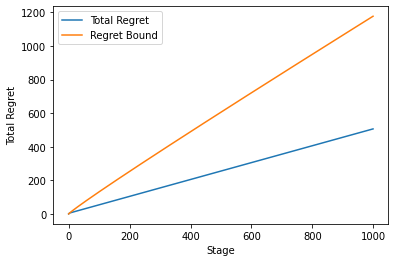

<Figure size 432x288 with 0 Axes>

In [9]:
#Plot stage vs regret
x = np.linspace(0, 10, 1000)

plt.plot(regretArray)
plt.plot(upperBound)
plt.legend(['Total Regret','Regret Bound'])
plt.xlabel("Stage")
plt.ylabel("Total Regret")
plt.show()
plt.savefig("Stage vs Regret")

## Extension

In [ ]:
# Helper Functions

# Actions in a 1-d action space
def generateActions(num):
    a = []
    for i in range(num):
        a.append(random.uniform(-10, 10))
    return a

# Tuple of (reward, delay)
def generateRewards(num):
    r = []
    for i in range(num):
        r.append((random.uniform(-1,1), random.randrange(0, 5)))
    return r

def getMax(rewards):
    r = []
    for i in rewards:
        r.append(i[0])
    return max(r)

def getClosestAction(xhat, a, currentAction):
    temp = a.copy()
    temp.remove(currentAction)
    
    return min(temp, key=lambda x:abs(x-xhat))
    

In [14]:
def exGOLD(a, r, mod):
    # Initialize variables
    totalRegret = [0]
    delayArray = []      # Keeps track of what stage the reward will be received (action, delay, regret)
    priorityQueue = []
    chosenActions = []   # Gradient update
    maxReward = getMax(r)
    
    Zt = []
    uhat = []
    
    initialAction = random.choice(a)
    index = a.index(initialAction)
    expectedRegret = maxReward - r[index][0]
    for i in range(mod):
        delayArray.append((initialAction, r[index*mod + i][1], expectedRegret))
    chosenActions.append(initialAction)
    
    for t in range(T):
        Zt.append(random.uniform(-1, 1))
        xhat = chosenActions[t] + delta * (Zt[t] - (1/10)*(chosenActions[t] - random.choice(a)))
        
        xhat = getClosestAction(xhat, a, chosenActions[t])
        
        uReward = 0
        for i in range(mod):
            uReward += r[a.index(xhat)*mod + i][0]
        uhat.append(uReward)
                
        for d in delayArray:
            if d[1] == t:
                priorityQueue.append(d[0])
                totalRegret.append(d[2] + totalRegret[-1])
                
        if len(priorityQueue) == 0:
            chosenActions.append(chosenActions[-1])
        else:
            qt = priorityQueue.pop(0)
            index = chosenActions.index(qt)
            vhat = 0.5 * uhat[index] * Zt[index]
            
            for i in a:
                minim = 100
                nextAction = i
                
                value = abs(i - (chosenActions[t] + 0.5 * vhat))
                
                if value < minim:
                    nextAction = i
                    minim = value
            chosenActions.append(nextAction)
            
        index = a.index(chosenActions[-1])
        for i in range(mod):
            delayArray.append((chosenActions[-1], t + r[index*mod + i][1], maxReward - r[index*mod + i][0]))
        
    return totalRegret

In [18]:
actions = generateActions(numActions)
rewards = generateRewards(numActions)
regretArray1 = exGOLD(actions, rewards, 1)

In [19]:
actions = generateActions(numActions)
rewards = generateRewards(numActions*2)
regretArray2 = exGOLD(actions, rewards, 2)

In [20]:
actions = generateActions(numActions)
rewards = generateRewards(numActions*3)
regretArray3 = exGOLD(actions, rewards, 3)

In [37]:
actions = generateActions(numActions)
rewards = generateRewards(numActions*4)
regretArray4 = exGOLD(actions, rewards, 4)

In [40]:
actions = generateActions(numActions)
rewards = generateRewards(numActions*5)
regretArray5 = exGOLD(actions, rewards, 5)

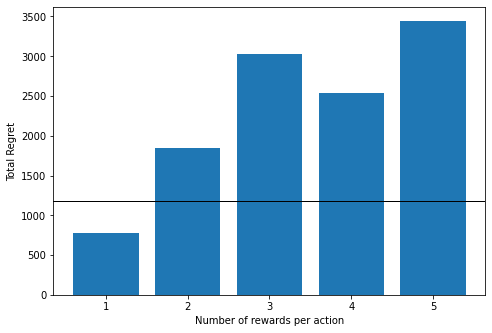

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
numRewards = ['1', '2', '3', '4', '5']
totalRegret = [regretArray1[-1], regretArray2[-1], regretArray3[-1], regretArray4[-1], regretArray5[-1]]
ax.bar(numRewards,totalRegret)
plt.axhline(y=pow(T, 3/4) + pow(T, 2/3 + 1/3),linewidth=1, color='k')
plt.xlabel("Number of rewards per action")
plt.ylabel("Total Regret")
plt.show()